In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt


## Data Preprocessing

In [2]:
train_X = pd.read_csv("train_X.csv")
train_y = pd.read_csv("train_y.csv")
test_X = pd.read_csv("test_X.csv")

In [3]:
test_X.head()

,Unnamed: 0,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000282651,ENSG00000282815,ENSG00000282939,ENSG00000283063,ENSG00000283439,ENSG00000283463,ENSG00000283526,ENSG00000283586,ENSG00000283632,ENSG00000283697
0,1576BB97-F8EA-48FF-9494-EBC7A0C97312,7.503849,1.685440,8.090089,5.546588,3.412025,5.871539,8.395029,5.894996,6.313896,...,3.626396,-2.640463,-7.278265,0.721287,-7.278265,4.672536,5.153675,-7.278265,4.843800,4.302864
1,63F4281A-4D90-4589-879E-549097FB3459,6.112919,-5.425877,5.604743,4.248246,3.374033,3.370075,6.804015,4.646287,6.236134,...,-5.425877,-2.143410,1.956699,1.377768,-5.425877,4.560829,3.735085,-5.425877,4.105789,4.803357
2,74CF740D-201D-4070-99B9-F007E7C4D472,6.183846,1.217355,6.093903,4.403216,5.722867,6.123209,7.680258,4.983386,5.626569,...,11.317818,-5.259782,5.093316,3.800607,-5.259782,4.966710,2.829487,-5.259782,5.118704,5.024979
3,1329E1C1-743E-4541-9081-165572D4BF47,6.325535,-0.197432,6.722632,4.509093,4.941256,3.700171,7.492606,5.031053,5.859242,...,3.536141,-1.362703,3.480703,0.776383,-0.999629,4.794226,-5.399485,-5.399485,4.660878,4.684343
4,88BBA1BF-44E0-416E-A028-04F410A3FE5D,7.162383,-5.539710,6.186110,5.270282,5.412103,3.781568,7.285779,4.847552,6.337205,...,5.112772,-5.539710,4.369268,2.927849,0.791397,4.542333,4.628775,-5.539710,4.812787,4.524834


In [38]:
train_y.head()

,Unnamed: 0,xml_neoplasm_histologic_grade
0,EB0D68BC-5FF9-44A5-A355-CA5441BFBA0A,0
1,0876B4BB-58BA-4C4C-84F4-E9D19EF96147,1
2,EACD1021-7B52-4531-8806-B7555B73AC84,0
3,368ACD26-C7FB-4974-BB7F-0AE22670CB0E,0
4,F23B0A1A-25AE-41D9-8C49-B692C4FDE1E4,1


In [39]:
train_X.info()
train_X.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Columns: 17971 entries, Unnamed: 0 to ENSG00000283697
dtypes: float64(17970), object(1)
memory usage: 60.9+ MB


,Unnamed: 0,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000282651,ENSG00000282815,ENSG00000282939,ENSG00000283063,ENSG00000283439,ENSG00000283463,ENSG00000283526,ENSG00000283586,ENSG00000283632,ENSG00000283697
0,EB0D68BC-5FF9-44A5-A355-CA5441BFBA0A,7.062725,0.026623,6.720413,5.449267,3.868619,4.587771,7.165112,4.643161,6.771731,...,0.325987,-5.545564,-5.545564,-5.545564,-5.545564,4.014351,4.841392,-5.545564,5.855893,3.618253
1,0876B4BB-58BA-4C4C-84F4-E9D19EF96147,5.965392,-5.431256,6.358498,4.161479,4.585293,4.326924,6.849703,4.391534,5.819945,...,5.910874,-0.945029,3.750430,1.611211,-0.498573,3.430928,3.160435,-5.431256,4.413930,3.353496
2,EACD1021-7B52-4531-8806-B7555B73AC84,7.892221,-5.851870,8.132992,5.986320,5.422599,4.728815,8.168477,6.289562,7.331591,...,10.103565,-5.851870,6.498217,5.481945,-5.851870,5.137298,4.296777,-5.851870,5.345372,5.028567
3,368ACD26-C7FB-4974-BB7F-0AE22670CB0E,6.826546,0.964851,5.998280,4.991435,4.963000,4.977695,7.149421,4.570863,6.008286,...,2.442099,-5.994056,2.862038,1.909955,0.568120,4.768694,3.983207,-5.994056,4.609411,4.329472
4,F23B0A1A-25AE-41D9-8C49-B692C4FDE1E4,7.059095,2.429954,6.746639,5.591316,5.111120,5.972938,7.576201,6.032083,6.470761,...,5.553223,-5.870484,3.044916,-5.870484,0.018320,4.640575,4.954957,-5.870484,4.620774,4.464277


In [40]:
train_y.info()
train_y.head(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Unnamed: 0                     444 non-null    object
 1   xml_neoplasm_histologic_grade  444 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 7.1+ KB


,Unnamed: 0,xml_neoplasm_histologic_grade
0,EB0D68BC-5FF9-44A5-A355-CA5441BFBA0A,0
1,0876B4BB-58BA-4C4C-84F4-E9D19EF96147,1
2,EACD1021-7B52-4531-8806-B7555B73AC84,0
3,368ACD26-C7FB-4974-BB7F-0AE22670CB0E,0
4,F23B0A1A-25AE-41D9-8C49-B692C4FDE1E4,1


In [41]:
print(train_X.shape)
print(train_y.shape)


(444, 17971)
(444, 2)


In [6]:
#keeping only the numerical columns
train_X1 = train_X.drop(train_X.columns[0], axis=1)
test_X1 = test_X.drop(test_X.columns[0], axis=1)
train_y1 = train_y.drop(train_y.columns[0], axis=1)

#standardizing the data
scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X1)
test_X_scaled = scaler.transform(test_X1)
train_X

,Unnamed: 0,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000282651,ENSG00000282815,ENSG00000282939,ENSG00000283063,ENSG00000283439,ENSG00000283463,ENSG00000283526,ENSG00000283586,ENSG00000283632,ENSG00000283697
0,EB0D68BC-5FF9-44A5-A355-CA5441BFBA0A,7.062725,0.026623,6.720413,5.449267,3.868619,4.587771,7.165112,4.643161,6.771731,...,0.325987,-5.545564,-5.545564,-5.545564,-5.545564,4.014351,4.841392,-5.545564,5.855893,3.618253
1,0876B4BB-58BA-4C4C-84F4-E9D19EF96147,5.965392,-5.431256,6.358498,4.161479,4.585293,4.326924,6.849703,4.391534,5.819945,...,5.910874,-0.945029,3.750430,1.611211,-0.498573,3.430928,3.160435,-5.431256,4.413930,3.353496
2,EACD1021-7B52-4531-8806-B7555B73AC84,7.892221,-5.851870,8.132992,5.986320,5.422599,4.728815,8.168477,6.289562,7.331591,...,10.103565,-5.851870,6.498217,5.481945,-5.851870,5.137298,4.296777,-5.851870,5.345372,5.028567
3,368ACD26-C7FB-4974-BB7F-0AE22670CB0E,6.826546,0.964851,5.998280,4.991435,4.963000,4.977695,7.149421,4.570863,6.008286,...,2.442099,-5.994056,2.862038,1.909955,0.568120,4.768694,3.983207,-5.994056,4.609411,4.329472
4,F23B0A1A-25AE-41D9-8C49-B692C4FDE1E4,7.059095,2.429954,6.746639,5.591316,5.111120,5.972938,7.576201,6.032083,6.470761,...,5.553223,-5.870484,3.044916,-5.870484,0.018320,4.640575,4.954957,-5.870484,4.620774,4.464277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,D4276C6F-9F0F-4F74-A85E-1E54272ADDED,7.009917,0.088022,6.814481,4.685804,3.039239,4.373218,6.826167,5.101784,6.327076,...,5.244168,-5.619018,3.953899,-5.619018,-0.021027,4.055201,3.052880,-5.619018,4.560183,3.889471
440,375C6EA2-4747-4959-9630-771FB8461BF1,4.772186,-5.062627,7.064273,5.505659,5.769194,4.307329,6.576986,4.018168,5.453594,...,6.641965,-0.284152,4.238647,5.431223,0.785492,3.489883,-5.062627,-5.062627,4.467892,3.335732
441,AE8BD116-5550-4A0F-BEBE-F092675A1F45,7.741897,1.467622,6.547112,4.994184,5.273657,6.069989,7.170169,5.740295,6.115446,...,5.963416,-5.380528,4.411300,2.265077,-5.380528,4.727461,4.502798,-5.380528,4.102909,4.326804
442,3762BBD4-190F-4DE4-91E6-0C483D066B82,5.774051,-6.793718,7.218590,5.477760,5.042350,3.700158,7.349451,4.573089,6.003810,...,6.036861,-6.793718,3.605128,2.503595,-6.793718,3.401223,4.962133,-6.793718,3.864213,3.200419


## Regularization Parameter 

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet

### Find Regularization Parameter for Ridge (by validation Curve and Cross Validation)

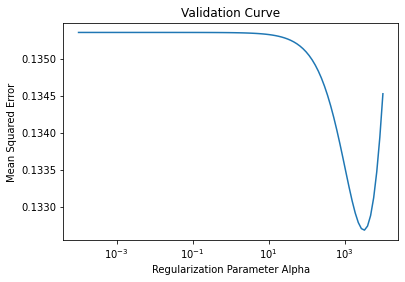

In [44]:
from sklearn.model_selection import validation_curve

# Range of regularization parameter values
param_range = np.logspace(-4, 4, 100)  # Values from 0.001 to 100

# Compute training and test scores
train_scores, test_scores = validation_curve(
    Ridge(), train_X_scaled, train_y1, param_name="alpha", param_range=param_range,
    cv=5, scoring="neg_mean_squared_error")

# Plot the validation curve
plt.semilogx(param_range, -np.mean(test_scores, axis=1))
plt.title("Validation Curve")
plt.xlabel("Regularization Parameter Alpha")
plt.ylabel("Mean Squared Error")
plt.show()


#### From the above curve, we can see the absolute minumum occur somewhere after 10^3

In [45]:
from sklearn.linear_model import RidgeCV

alphas = np.logspace(-4, 4, 100)  # 100 values between 10^-4 and 10^4

ridge_cv = RidgeCV(alphas=alphas, cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(train_X_scaled, train_y1)
best_alpha = ridge_cv.alpha_
print(f'Best alpha: {best_alpha}')

Best alpha: 3274.5491628777318


#### By further Calculation, we found the regularization parameter for Ridge is 3274.55

### Find Regularization Parameter for LASSO

In [46]:
from sklearn.linear_model import LassoCV

alphas = np.logspace(-4, 4, 100)  
lasso_cv = LassoCV(alphas=alphas, cv=5)
lasso_cv.fit(train_X_scaled, train_y1.squeeze())
best_alpha = lasso_cv.alpha_
print(f'Best alpha: {best_alpha}')


Best alpha: 0.026560877829466867


### Find Regularization Parameter for ElasticNet (combine L1 and L2)

In [47]:
from sklearn.linear_model import ElasticNetCV

alphas = np.logspace(-4, 4, 100)
l1_ratios = np.linspace(0.1, 0.9, 9)  # l1_ratio=1 corresponds to Lasso, l1_ratio=0 to Ridge

enet = ElasticNetCV(alphas=alphas, l1_ratio=l1_ratios, cv=5)
enet.fit(train_X_scaled, train_y1.squeeze())

print(f'Best alpha: {enet.alpha_}')
print(f'Best l1 ratio: {enet.l1_ratio_}')


Best alpha: 0.24770763559917114
Best l1 ratio: 0.1


## Pipline with F1/accuracy scores

In [48]:
from sklearn.preprocessing import StandardScaler

train_X_pos = train_X_scaled - np.min(train_X_scaled) + 0.001
test_X_pos = test_X_scaled - np.min(test_X_scaled) + 0.001
log_transformed_X = np.log(train_X_pos)
log_test_X = np.log(test_X_pos)
#log transformation
scaler = StandardScaler()
log_transformed_standardized_X = scaler.fit_transform(log_transformed_X)
log_t_test_X = scaler.fit_transform(log_test_X)


In [49]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.metrics import f1_score, accuracy_score

pipelines = {
    'linear_reg': Pipeline([('scaler', StandardScaler()), ('model', LinearRegression())]),
    'logistic_reg': Pipeline([('scaler', MinMaxScaler()), ('model', LogisticRegression(max_iter=10000))]),
    'ridge_reg': Pipeline([('scaler', StandardScaler()), ('model', Ridge(alpha = 3274.55))]),
    'lasso': Pipeline([('scaler', StandardScaler()), ('model', Lasso(alpha = 0.02656))]),
    'ElasticNet': Pipeline([('scaler', StandardScaler()), ('model', ElasticNet(alpha=0.2477, l1_ratio=0.1))])
}

for name, pipeline in pipelines.items():
    pipeline.fit(log_transformed_standardized_X, train_y1.squeeze())
    
    # Predictions from Cross-validation
    predicted_values = cross_val_predict(pipeline, log_transformed_standardized_X, train_y1.squeeze(), cv=5)
    predicted_classes = (predicted_values > 0.5).astype(int)

    # compute f1 score and accuracy
    f1 = f1_score(train_y1, predicted_classes)
    acc = accuracy_score(train_y1, predicted_classes)

    print(f'{name} Cross-Validation f1 Scores: {f1}')
    #print(f'{name} Average f1 Score: {f1.mean():.5f}')
    print(f'{name} Cross-Validation accuracy Scores: {acc}')
    #print(f'{name} Average accuracy Score: {acc.mean():.5f}')
    print()

    pred = pipeline.predict(log_t_test_X)
    pred_binary = np.where(pred >= 0.5, 1, 0)
    
    submission_df = pd.DataFrame()
    submission_df['ID'] = test_X['Unnamed: 0']
    submission_df['xml_neoplasm_histologic_grade'] = pred_binary

    submission_df.to_csv(f'{name}.csv', index=False)



linear_reg Cross-Validation f1 Scores: 0.8514851485148516
linear_reg Cross-Validation accuracy Scores: 0.831081081081081

logistic_reg Cross-Validation f1 Scores: 0.867704280155642
logistic_reg Cross-Validation accuracy Scores: 0.8468468468468469

ridge_reg Cross-Validation f1 Scores: 0.8493150684931507
ridge_reg Cross-Validation accuracy Scores: 0.8265765765765766

lasso Cross-Validation f1 Scores: 0.8310679611650486
lasso Cross-Validation accuracy Scores: 0.8040540540540541

ElasticNet Cross-Validation f1 Scores: 0.8336594911937378
ElasticNet Cross-Validation accuracy Scores: 0.8085585585585585



### Since we know a higher F1 score indicates a better balance between precision and recall, and a higher accuracy indicates better performance, by observing the f1 scores and the acuuracy scores for all the methods, we can see that the linear regression method has the highest of both score of all the other method. Thus, linear regression has the best performance in both aspects.

## Pipline with smaller regularization parameter 

In [50]:
pipelines = {
    'linear_reg': Pipeline([('scaler', StandardScaler()), ('model', LinearRegression())]),
    'logistic_reg': Pipeline([('scaler', StandardScaler()), ('model', LogisticRegression(max_iter=10000))]),
    'ridge_reg': Pipeline([('scaler', StandardScaler()), ('model', Ridge(alpha = 1000))]),
    'lasso': Pipeline([('scaler', StandardScaler()), ('model', Lasso(alpha = 0.000001))]),
    'ElasticNet': Pipeline([('scaler', StandardScaler()), ('model', ElasticNet(alpha=0.1, l1_ratio=0.1))])

}
for name, pipeline in pipelines.items():
    pipeline.fit(log_transformed_standardized_X, train_y1.squeeze())
    
    # Predictions from Cross-validation
    predicted_values = cross_val_predict(pipeline, log_transformed_standardized_X, train_y1.squeeze(), cv=5)
    predicted_classes = (predicted_values > 0.5).astype(int)

    # compute f1 score and accuracy
    f1 = f1_score(train_y1, predicted_classes)
    acc = accuracy_score(train_y1, predicted_classes)

    print(f'{name} Cross-Validation f1 Scores: {f1}')
    #print(f'{name} Average f1 Score: {f1.mean():.5f}')
    print(f'{name} Cross-Validation accuracy Scores: {acc}')
    #print(f'{name} Average accuracy Score: {acc.mean():.5f}')
    print()


linear_reg Cross-Validation f1 Scores: 0.8514851485148516
linear_reg Cross-Validation accuracy Scores: 0.831081081081081

logistic_reg Cross-Validation f1 Scores: 0.858252427184466
logistic_reg Cross-Validation accuracy Scores: 0.8355855855855856

ridge_reg Cross-Validation f1 Scores: 0.8498023715415021
ridge_reg Cross-Validation accuracy Scores: 0.8288288288288288

lasso Cross-Validation f1 Scores: 0.7895791583166333
lasso Cross-Validation accuracy Scores: 0.7635135135135135

ElasticNet Cross-Validation f1 Scores: 0.8382066276803118
ElasticNet Cross-Validation accuracy Scores: 0.8130630630630631



### By shrinking the regularization parameter, the f1 score and accuracy score for  ridge regression and elastic net increases, while lasso decreases.

## Pipline with greater regularization parameter 

In [51]:
pipelines = {
    'linear_reg': Pipeline([('scaler', StandardScaler()), ('model', LinearRegression())]),
    'logistic_reg': Pipeline([('scaler', StandardScaler()), ('model', LogisticRegression(max_iter=10000))]),
    'ridge_reg': Pipeline([('scaler', StandardScaler()), ('model', Ridge(alpha = 5000))]),
    'lasso': Pipeline([('scaler', StandardScaler()), ('model', Lasso(alpha = 0.1))]),
    'ElasticNet': Pipeline([('scaler', StandardScaler()), ('model', ElasticNet(alpha=0.5, l1_ratio=0.1))])

}
for name, pipeline in pipelines.items():
    pipeline.fit(log_transformed_standardized_X, train_y1.squeeze())
    
    # Predictions from Cross-validation
    predicted_values = cross_val_predict(pipeline, log_transformed_standardized_X, train_y1.squeeze(), cv=5)
    predicted_classes = (predicted_values > 0.5).astype(int)

    # compute f1 score and accuracy
    f1 = f1_score(train_y1, predicted_classes)
    acc = accuracy_score(train_y1, predicted_classes)

    print(f'{name} Cross-Validation f1 Scores: {f1}')
    #print(f'{name} Average f1 Score: {f1.mean():.5f}')
    print(f'{name} Cross-Validation accuracy Scores: {acc}')
    #print(f'{name} Average accuracy Score: {acc.mean():.5f}')
    print()

    

linear_reg Cross-Validation f1 Scores: 0.8514851485148516
linear_reg Cross-Validation accuracy Scores: 0.831081081081081

logistic_reg Cross-Validation f1 Scores: 0.858252427184466
logistic_reg Cross-Validation accuracy Scores: 0.8355855855855856

ridge_reg Cross-Validation f1 Scores: 0.8515625
ridge_reg Cross-Validation accuracy Scores: 0.8288288288288288

lasso Cross-Validation f1 Scores: 0.8237547892720307
lasso Cross-Validation accuracy Scores: 0.7927927927927928

ElasticNet Cross-Validation f1 Scores: 0.83203125
ElasticNet Cross-Validation accuracy Scores: 0.8063063063063063



### By inducing the regularization parameter, the f1 score and accuracy score for ridge regression and elastic net increases, while lasso decreases.

## Best model accuracy vs. random guessing accuracy

### Training best model (linear regression)

In [52]:
from sklearn.model_selection import train_test_split

# further split my data for tuning
train_X_small, val_X, train_y_small, val_y = train_test_split(train_X_scaled, train_y1, test_size=0.2, random_state=42)

# Train it with linear regression
lr = LinearRegression()
lr.fit(train_X_small, train_y_small)

predictions = lr.predict(val_X)
thresholded_predictions = [1 if pred >= 0.5 else 0 for pred in predictions]

lr_accuracy = accuracy_score(val_y, thresholded_predictions)
print(f'Accuracy of Linear Regression: {lr_accuracy}')


Accuracy of Linear Regression: 0.8539325842696629


###  perform y-randomization

In [53]:
from sklearn.utils import shuffle

# Y-Randomization: Scramble the labels of my smaller training data
scrambled_train_y_small = shuffle(train_y_small, random_state=777)

# Train model on scrambled labels
lr_random = LinearRegression()
lr_random.fit(train_X_small, scrambled_train_y_small)

random_predictions = lr_random.predict(val_X)
thresholded_random_predictions = [1 if pred >= 0.5 else 0 for pred in random_predictions]

lr_random_accuracy = accuracy_score(val_y, thresholded_random_predictions)
print(f'Accuracy with Y-Randomization: {lr_random_accuracy}')


Accuracy with Y-Randomization: 0.5056179775280899


### The accuracy of my Linear Regression model is approximately 85.4% on the validation set, indicating that the model has learned meaningful patterns from the training data. However, the model trained on scrambled labels achieved an accuracy of around 50.6%, which is near the level of random guessing, meaning that the original model's performance is not due to spurious correlations. 
### This tells that there are still potential areas for further improvement to boost performance.


## Feature Selection

### Random Forest 

In [55]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

gene_names = train_X1.columns.tolist()

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(train_X_scaled, train_y1.squeeze())

feature_importances_rf = pd.DataFrame(rf.feature_importances_, index=gene_names, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances_rf.head(10))  # Top 10 important genes


                 importance
ENSG00000163501    0.005703
ENSG00000016402    0.005659
ENSG00000164488    0.005611
ENSG00000163071    0.005270
ENSG00000243543    0.004733
ENSG00000170099    0.004619
ENSG00000188761    0.004334
ENSG00000107611    0.004144
ENSG00000166828    0.004017
ENSG00000165188    0.003989


### Chi-square Test

In [56]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = train_X_scaled - np.min(train_X_scaled) + 0.001
y = train_y1

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(gene_names)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['gene','Score']  
print(featureScores.nlargest(10,'Score'))  #print top 10



                  gene     Score
10364  ENSG00000163501  9.009879
4377   ENSG00000116299  8.293520
10257  ENSG00000163071  8.001277
5394   ENSG00000125434  7.890831
684    ENSG00000053900  7.392277
3294   ENSG00000107611  7.217038
5357   ENSG00000124939  7.212111
9251   ENSG00000154556  7.025586
1163   ENSG00000072858  6.911169
9801   ENSG00000159714  6.872445


### Upon conducting the aforementioned tests, I obtained two sets of the top 10 most crucial genes for model decision-making. While the results from these tests vary, I noticed a commonality where genes ENSG00000163501, ENSG00000163071, and ENSG00000107611 appear in both sets. Therefore, I would assert that these three genes are the top three most significant genes for model decision-making.

### Trying to remove the least 500 important genes to see if the f1 and accuracy score will increase:

In [57]:
train_X_df = pd.DataFrame(X, columns=gene_names)
test_X_df = pd.DataFrame(test_X1, columns=gene_names)

least_important_features = featureScores.nsmallest(500, 'Score')
genes_to_drop = least_important_features['gene'].tolist()
train_X_reduced = train_X_df.drop(columns=genes_to_drop)

test_X_reduced = test_X_df.drop(columns=genes_to_drop)

In [58]:
pipelines = {
    'linear_reg': Pipeline([('scaler', StandardScaler()), ('model', LinearRegression())]),
    'logistic_reg': Pipeline([('scaler', StandardScaler()), ('model', LogisticRegression(max_iter=10000))]),
    'ridge_reg': Pipeline([('scaler', StandardScaler()), ('model', Ridge(alpha = 1000))]),
    'lasso': Pipeline([('scaler', StandardScaler()), ('model', Lasso(alpha = 0.000001))]),
    'ElasticNet': Pipeline([('scaler', StandardScaler()), ('model', ElasticNet(alpha=0.1, l1_ratio=0.1))])

}
for name, pipeline in pipelines.items():
    pipeline.fit(train_X_reduced, train_y1.squeeze())
    
    # Predictions from Cross-validation
    predicted_values = cross_val_predict(pipeline, train_X_reduced, train_y1.squeeze(), cv=5)
    predicted_classes = (predicted_values > 0.5).astype(int)

    # compute f1 score and accuracy
    f1 = f1_score(train_y1, predicted_classes)
    acc = accuracy_score(train_y1, predicted_classes)

    print(f'{name} Cross-Validation f1 Scores: {f1}')
    #print(f'{name} Average f1 Score: {f1.mean():.5f}')
    print(f'{name} Cross-Validation accuracy Scores: {acc}')
    #print(f'{name} Average accuracy Score: {acc.mean():.5f}')
    print()
    
    '''pred = pipeline.predict(test_X_reduced)
    pred_binary = np.where(pred >= 0.5, 1, 0)
    
    submission_df = pd.DataFrame()
    submission_df['ID'] = test_X['Unnamed: 0']
    submission_df['xml_neoplasm_histologic_grade'] = pred_binary

    submission_df.to_csv(f'{name}.csv', index=False)
'''

linear_reg Cross-Validation f1 Scores: 0.8565737051792829
linear_reg Cross-Validation accuracy Scores: 0.8378378378378378

logistic_reg Cross-Validation f1 Scores: 0.8515625
logistic_reg Cross-Validation accuracy Scores: 0.8288288288288288

ridge_reg Cross-Validation f1 Scores: 0.8571428571428571
ridge_reg Cross-Validation accuracy Scores: 0.8378378378378378

lasso Cross-Validation f1 Scores: 0.7935871743486974
lasso Cross-Validation accuracy Scores: 0.7680180180180181

ElasticNet Cross-Validation f1 Scores: 0.8369351669941061
ElasticNet Cross-Validation accuracy Scores: 0.8130630630630631



### The scores increases as I removed irrelevant genes

## Visualize two groups of patients

In [59]:
df = pd.concat([train_X, train_y], axis=1)
df = df.drop(columns=['Unnamed: 0'])
df

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,...,ENSG00000282815,ENSG00000282939,ENSG00000283063,ENSG00000283439,ENSG00000283463,ENSG00000283526,ENSG00000283586,ENSG00000283632,ENSG00000283697,xml_neoplasm_histologic_grade
0,7.062725,0.026623,6.720413,5.449267,3.868619,4.587771,7.165112,4.643161,6.771731,4.750296,...,-5.545564,-5.545564,-5.545564,-5.545564,4.014351,4.841392,-5.545564,5.855893,3.618253,0
1,5.965392,-5.431256,6.358498,4.161479,4.585293,4.326924,6.849703,4.391534,5.819945,3.435322,...,-0.945029,3.750430,1.611211,-0.498573,3.430928,3.160435,-5.431256,4.413930,3.353496,1
2,7.892221,-5.851870,8.132992,5.986320,5.422599,4.728815,8.168477,6.289562,7.331591,5.336794,...,-5.851870,6.498217,5.481945,-5.851870,5.137298,4.296777,-5.851870,5.345372,5.028567,0
3,6.826546,0.964851,5.998280,4.991435,4.963000,4.977695,7.149421,4.570863,6.008286,5.474553,...,-5.994056,2.862038,1.909955,0.568120,4.768694,3.983207,-5.994056,4.609411,4.329472,0
4,7.059095,2.429954,6.746639,5.591316,5.111120,5.972938,7.576201,6.032083,6.470761,5.380887,...,-5.870484,3.044916,-5.870484,0.018320,4.640575,4.954957,-5.870484,4.620774,4.464277,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,7.009917,0.088022,6.814481,4.685804,3.039239,4.373218,6.826167,5.101784,6.327076,3.517293,...,-5.619018,3.953899,-5.619018,-0.021027,4.055201,3.052880,-5.619018,4.560183,3.889471,1
440,4.772186,-5.062627,7.064273,5.505659,5.769194,4.307329,6.576986,4.018168,5.453594,3.499849,...,-0.284152,4.238647,5.431223,0.785492,3.489883,-5.062627,-5.062627,4.467892,3.335732,1
441,7.741897,1.467622,6.547112,4.994184,5.273657,6.069989,7.170169,5.740295,6.115446,6.510703,...,-5.380528,4.411300,2.265077,-5.380528,4.727461,4.502798,-5.380528,4.102909,4.326804,1
442,5.774051,-6.793718,7.218590,5.477760,5.042350,3.700158,7.349451,4.573089,6.003810,4.067563,...,-6.793718,3.605128,2.503595,-6.793718,3.401223,4.962133,-6.793718,3.864213,3.200419,0


### PCA

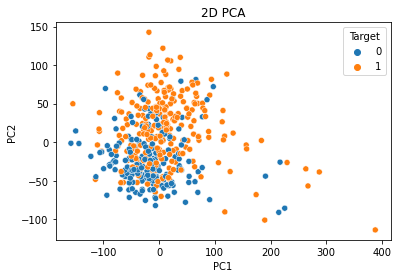

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Assuming df is your DataFrame
X = df.drop(columns=[df.columns[-1]])  # Exclude the last column (target variable)
y = df[df.columns[-1]]  # Only the last column (target variable)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

# Create a DataFrame with the principal components and the target variable
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pc_df['Target'] = y

# Plot the 2D projection
sns.scatterplot(x='PC1', y='PC2', hue='Target', data=pc_df)
plt.title('2D PCA')
plt.show()



### TSNE

/Users/77wu/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/77wu/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


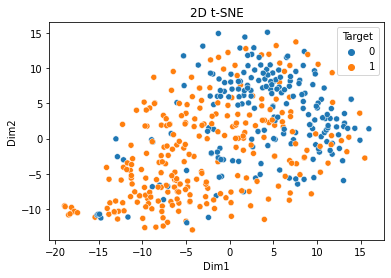

In [61]:
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(X)

# Create a DataFrame with the t-SNE results and the target variable
tsne_df = pd.DataFrame(data=tsne_results, columns=['Dim1', 'Dim2'])
tsne_df['Target'] = y

# Plot the 2D projection
sns.scatterplot(x='Dim1', y='Dim2', hue='Target', data=tsne_df)
plt.title('2D t-SNE')
plt.show()


### From the PCA and t-SNE graphs, coupled with the accuracy score we computed earlier, it appears that linear regression is a favorable model for this data. The PCA plot effectively illustrates the linear structure of the data, as evidenced by the distinct clustering of patients. Patients belonging to tumor grade III+ are clustered at the top, while those associated with tumor grade II- are clustered at the bottom of the graph. Conversely, the 2D t-SNE graph displays some overlap between the two patient groups, suggesting a mix in the local structure of the data. This overlap might indicate that higher-dimensional regression models may not be the optimal choice in this scenario.